## Data Wrangling
Process of:
- Cleaning
- Tranforming
- Organizing
for analysis and Visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=sns.load_dataset('titanic')
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df.drop(columns='deck',inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [5]:
# filling missing values in age coulmn by mean.
df['age'].fillna(df['age'].mean(),inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [7]:
df['embark_town'].fillna(df['embark_town'].mean,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


### Outlier detection by it methods.
- By visualization method:

<Axes: xlabel='sex', ylabel='age'>

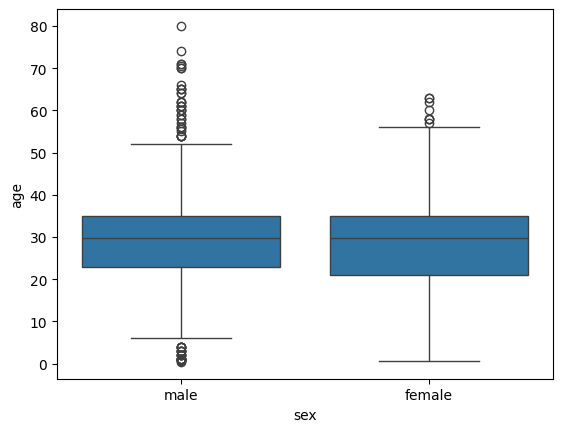

In [9]:
sns.boxplot(data=df, y='age', x='sex')

## - By IQR Method

In [10]:
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)
df=df[(df['age']>lower_limit) & (df['age']<upper_limit)]


13.0
2.5
54.5


In [11]:
df.shape

(825, 14)

In [12]:
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit)
print(upper_limit)
df=df[(df['fare']>lower_limit) & (df['fare']<upper_limit)]

22.174999999999997
-25.366699999999994
63.333299999999994


In [13]:
df.shape

(718, 14)

In [14]:
# Z-score Method
from scipy import stats
import numpy as np

In [15]:
zscore=np.abs(stats.zscore(df['age']))
threshould=3
print(np.where(zscore>threshould))
df=df[(zscore<threshould)]



(array([], dtype=int64),)


In [16]:
# applying z-score method on age column
from scipy import stats
import numpy as np

zscore=np.abs(stats.zscore(df['age']))
threshould=3
print(np.where(zscore>threshould))
df=df[(zscore<threshould)]

df.shape



(array([], dtype=int64),)


(718, 14)

This code is using the Z-score method to detect and remove outliers from the 'age' column of a DataFrame `df`. Here's a step-by-step explanation:

1. `from scipy import stats` and `import numpy as np`: These lines import the necessary libraries. `scipy.stats` contains statistical functions, and `numpy` is used for numerical operations.

2. `zscore=np.abs(stats.zscore(df['age']))`: This line calculates the Z-score for each value in the 'age' column of the DataFrame. The Z-score is a measure of how many standard deviations an element is from the mean. The `np.abs()` function is used to get the absolute value of the Z-scores.

3. `threshould=3`: This line sets the threshold for what will be considered an outlier. In this case, any 'age' value that is more than 3 standard deviations away from the mean will be considered an outlier.

4. `print(np.where(zscore>threshould))`: This line prints the indices of the outliers in the 'age' column.

5. `df=df[(zscore<threshould)]`: This line removes the outliers from the DataFrame. It keeps only the rows where the 'age' value's Z-score is less than the threshold.

After running this code, `df` will no longer contain any 'age' values that are considered outliers according to the Z-score method.

### - Data Normalization
- To bring data at one scale.

The `MinMaxScaler` from `sklearn.preprocessing` is a tool used to normalize the range of features in your data. Normalization is a scaling technique that assumes your data follows a Gaussian distribution and will scale them to a range between 0 and 1.

If you want to apply `MinMaxScaler` to the 'age' and 'fare' columns in the Titanic dataset during data wrangling, you can do so as follows:



In [17]:
from sklearn.preprocessing import MinMaxScaler



This code will replace the original 'age' and 'fare' values with the scaled values. After this transformation, the minimum value in each column will be 0, and the maximum value will be 1. All other values will be in between, maintaining their original distribution.

Remember, before applying `MinMaxScaler`, it's important to handle missing values in these columns, as the scaler cannot work with missing data.

In [18]:
# will be used for numerical columns which have some units and we want to scale them between 0 to 1.
min_max=MinMaxScaler() # we mada a scale object and we fit and transform the data in one go.
df['age']=min_max.fit_transform(df[['age']])
df['fare']=min_max.fit_transform(df[['fare']])

df.head()





,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True


## Organizong the Data.
- Ater cleaning the data we should organize it.
- for example parch and sibsp can organize in one column.
- no need of 2 columns.

In [19]:
df['family_size']=df['sibsp']+df['parch']

In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True,0


<Axes: xlabel='family_size', ylabel='Count'>

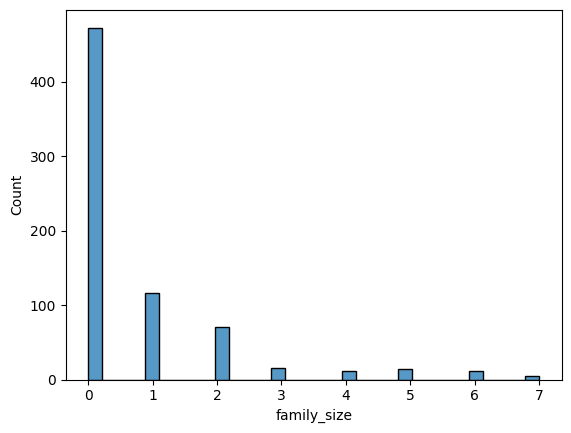

In [21]:
sns.histplot(data=df, x='family_size')

## Saving the data.
- All steps performed
- now we will save the data

In [22]:
df.to_csv('titanic_cleaned.csv')

In [28]:
df.duplicated().sum()

103